Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5173 - loss: 0.7893 - val_accuracy: 0.6100 - val_loss: 0.6889
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.5791 - loss: 0.6857 - val_accuracy: 0.5730 - val_loss: 0.6648
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6263 - loss: 0.6389 - val_accuracy: 0.6280 - val_loss: 0.6247
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6921 - loss: 0.5862 - val_accuracy: 0.6720 - val_loss: 0.6017
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.7245 - loss: 0.5514 - val_accuracy: 0.7200 - val_loss: 0.5570


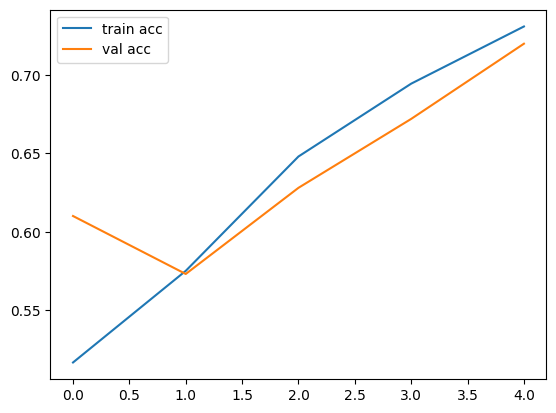

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import os, zipfile

# Download dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=dataset_url)

# Extract dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

# Correct base directory
base_dir = os.path.join(os.path.dirname(zip_path), "cats_and_dogs_filtered")
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")

# Image size and batch size
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

# Load datasets
train_data = image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_data = image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Normalize pixel values
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

# Save model
model.save("cat_dog_cnn.h5")

# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
